In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Added dependencies
from sklearn.model_selection import train_test_split

In [2]:
# Reading the data
df = pd.read_csv('AEP_hourly.csv')
df.head(5)
test_original = df.copy()


In [3]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [4]:
# # Shape the data
X = df['Datetime'].values
y = df['AEP_MW'].values

print("Shape: ", X.shape, y.shape)
print(y)

Shape:  (121273,) (121273,)
[13478. 12865. 12577. ... 20820. 20415. 19993.]


In [5]:
# Split the data in training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape, y_train.shape

((90954,), (90954,))

In [6]:
# Change the numpy arrays back into dataframes
train_df = pd.DataFrame({"Datetime": [item for item in X_train], "AEP_MW": [int(item) for item in y_train]})
train_df.head(5)
test_df = pd.DataFrame({"Datetime": [item for item in X_test], "AEP_MW": [int(item) for item in y_test]})

In [7]:
train_df['Datetime'] = pd.to_datetime(train_df.Datetime,format='%Y-%m-%d %H:%M:%S')
test_df['Datetime'] = pd.to_datetime(test_df.Datetime,format='%Y-%m-%d %H:%M:%S')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%Y-%m-%d %H:%M:%S')

In [8]:
train_df.head(5)
train_original = train_df.copy()

In [9]:
test_df.head(5)

,Datetime,AEP_MW
0,2010-01-27 16:00:00,17769
1,2010-05-19 04:00:00,11394
2,2011-01-09 16:00:00,17688
3,2005-04-05 21:00:00,15632
4,2010-07-15 16:00:00,22689


In [10]:
# Checking the variables
train_df.columns, test_df.columns
print(type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
# Data type 
train_df.dtypes, test_df.dtypes

(Datetime    datetime64[ns]
 AEP_MW               int64
 dtype: object, Datetime    datetime64[ns]
 AEP_MW               int64
 dtype: object)

In [12]:
# Shape of data
train_df.shape, test_df.shape

((90954, 2), (30319, 2))

In [13]:
# Start and end date for train_df
train_df['Datetime'].min(),train_df['Datetime'].max()

(Timestamp('2004-10-01 01:00:00'), Timestamp('2018-08-02 23:00:00'))

In [14]:
# Start and end date for test_df
test_df['Datetime'].min(),test_df['Datetime'].max()

(Timestamp('2004-10-01 05:00:00'), Timestamp('2018-08-03 00:00:00'))

In [15]:
# Creating new features
for i in (train_df, test_df, test_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [16]:
# weekend variable
train_df['day of week']=train_df['Datetime'].dt.dayofweek
temp = train_df['Datetime']

In [17]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train_df['Datetime'].apply(applyer)
train_df['weekend']=temp2

In [18]:
train_df.head(5)

,Datetime,AEP_MW,year,month,day,Hour,day of week,weekend
0,2006-11-20 23:00:00,17277,2006,11,20,23,0,0
1,2011-01-22 07:00:00,20084,2011,1,22,7,5,1
2,2014-05-22 00:00:00,13444,2014,5,22,0,3,0
3,2014-05-12 05:00:00,10996,2014,5,12,5,0,0
4,2007-01-28 22:00:00,20243,2007,1,28,22,6,1


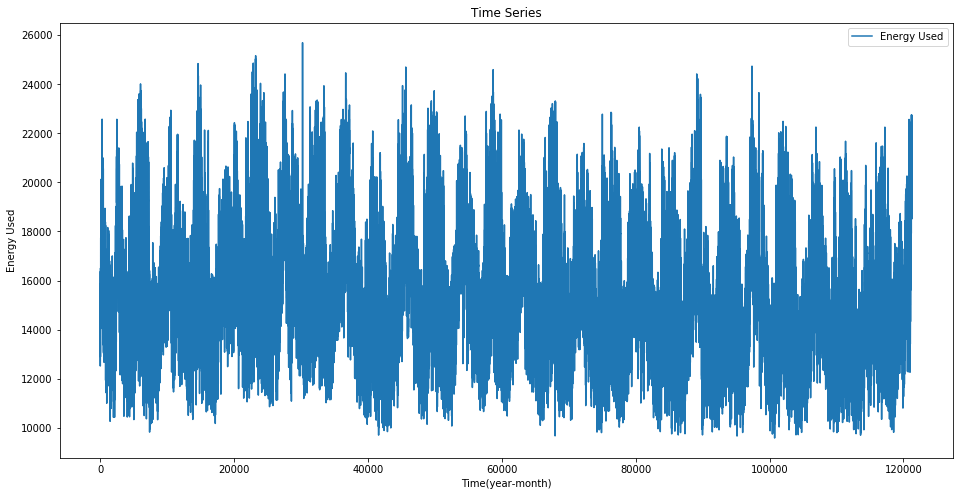

In [24]:
train_df.index = train_df['Datetime'] # indexing the Datetime to get the time period on the x-axis.
# df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['AEP_MW']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Energy Used')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Energy Used")
plt.legend(loc='best')
plt.savefig('images/time_series.png')

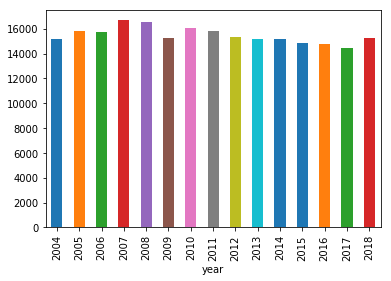

In [23]:
# Year wise energy use
train_df.groupby('year')['AEP_MW'].mean().plot.bar()
plt.savefig('images/groupby_year.png')

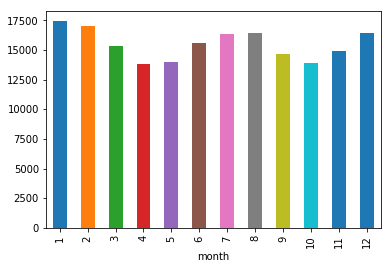

In [27]:
# Month wise energy use
train_df.groupby('month')['AEP_MW'].mean().plot.bar()
plt.savefig('images/groupby_month.png')

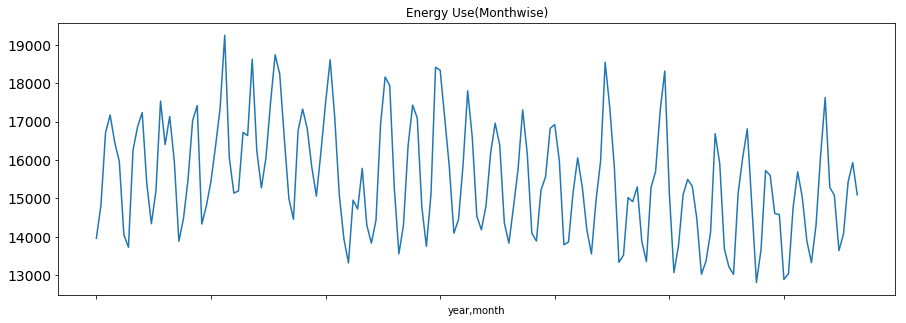

In [22]:
temp=train_df.groupby(['year', 'month'])['AEP_MW'].mean()
temp.plot(figsize=(15,5), title='Energy Use(Monthwise)', fontsize=14)

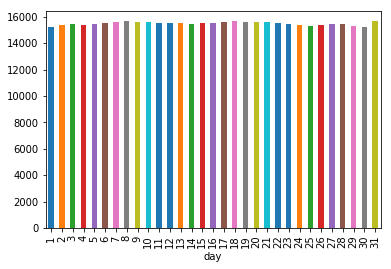

In [25]:
# Daywise energy use
train_df.groupby('day')['AEP_MW'].mean().plot.bar()
plt.savefig('images/groupby_day.png')

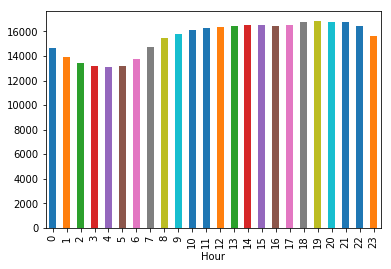

In [26]:
# Hourly energy use
train_df.groupby('Hour')['AEP_MW'].mean().plot.bar()
plt.savefig('images/groupby_hour.png')

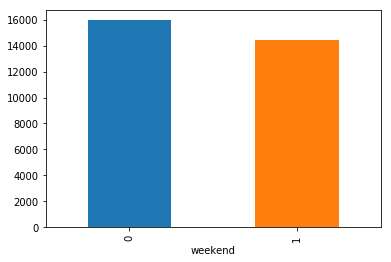

In [25]:
# Energy use on weekend
train_df.groupby('weekend')['AEP_MW'].mean().plot.bar()

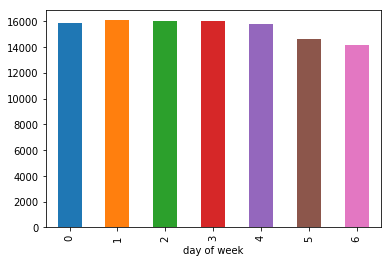

In [28]:
train_df.groupby('day of week')['AEP_MW'].mean().plot.bar()
plt.savefig('images/groupby_day_of_week.png')

In [27]:
train_df.Timestamp = pd.to_datetime(train_df.Datetime,format='%Y-%m-%d %H:%M:%S') 
train_df.index = train_df.Timestamp

# Hourly time series
hourly = train_df.resample('H').mean()

# Converting to daily mean
daily = train_df.resample('D').mean()

# Converting to weekly mean
weekly = train_df.resample('W').mean()

# Converting to monthly mean
monthly = train_df.resample('M').mean()

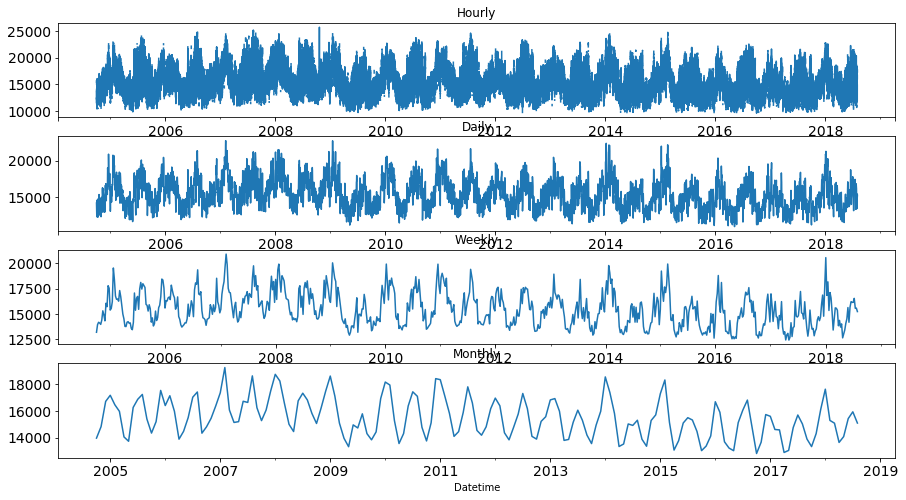

In [28]:
fig, axs = plt.subplots(4,1)

hourly.AEP_MW.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.AEP_MW.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.AEP_MW.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.AEP_MW.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [29]:
test_df.Timestamp = pd.to_datetime(test_df.Datetime,format='%Y-%m-%d %H:%M:%S') 
test_df.index = test_df.Timestamp 

# Converting to daily mean
test_df = test_df.resample('D').mean()

train_df.Timestamp = pd.to_datetime(train_df.Datetime,format='%Y-%m-%d %H:%M:%S') 
train_df.index = train_df.Timestamp

# Converting to daily mean
train_df = train_df.resample('D').mean()

In [30]:
# Model Building
Train=train_df.ix['2004-10-01':'2014-10-01']
valid=train_df.ix['2014-10-02':'2018-08-03']

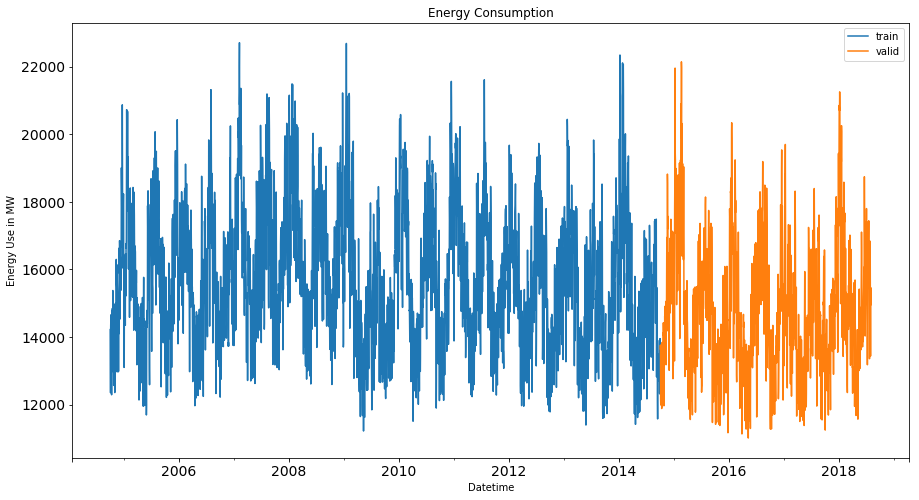

In [31]:
# Checking the train and validation split
Train.AEP_MW.plot(figsize=(15,8), title= 'Energy Consumption', fontsize=14, label='train')
valid.AEP_MW.plot(figsize=(15,8), title= 'Energy Consumption', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Energy Use in MW")
plt.legend(loc='best')
plt.show()

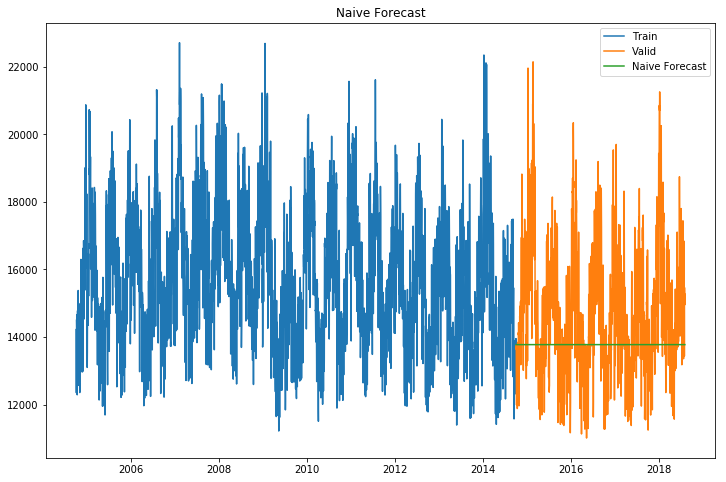

In [32]:
# Naive Approach
dd= np.asarray(Train.AEP_MW)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['AEP_MW'], label='Train')
plt.plot(valid.index,valid['AEP_MW'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.AEP_MW, y_hat.naive))
print(rms)

2155.1502990558574


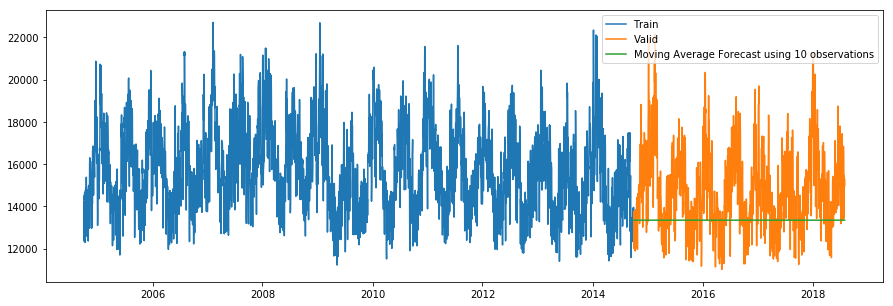

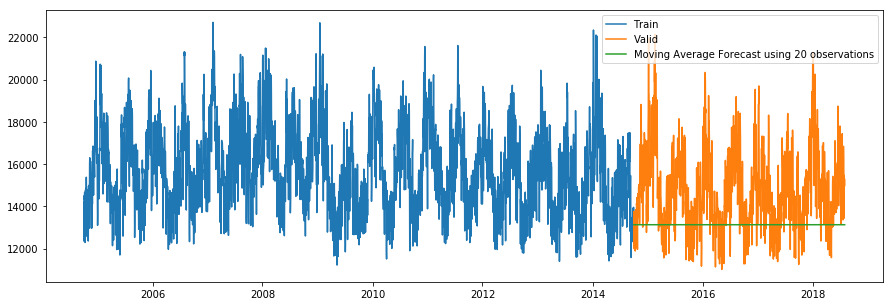

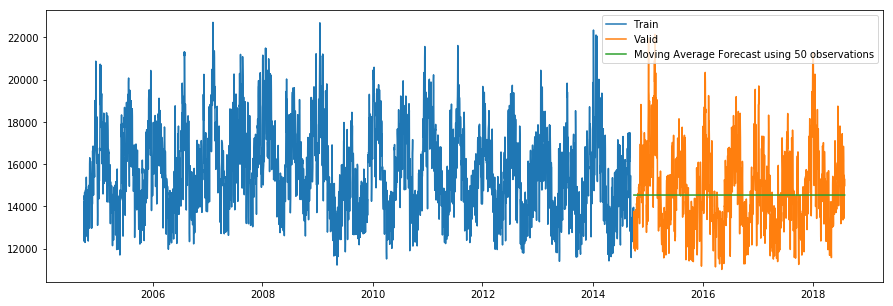

In [34]:
# Moving Average
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['AEP_MW'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['AEP_MW'], label='Train')
plt.plot(valid['AEP_MW'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['AEP_MW'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['AEP_MW'], label='Train')
plt.plot(valid['AEP_MW'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['AEP_MW'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['AEP_MW'], label='Train')
plt.plot(valid['AEP_MW'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [35]:
rms = sqrt(mean_squared_error(valid.AEP_MW, y_hat_avg.moving_avg_forecast))
print(rms)

1910.046528569913


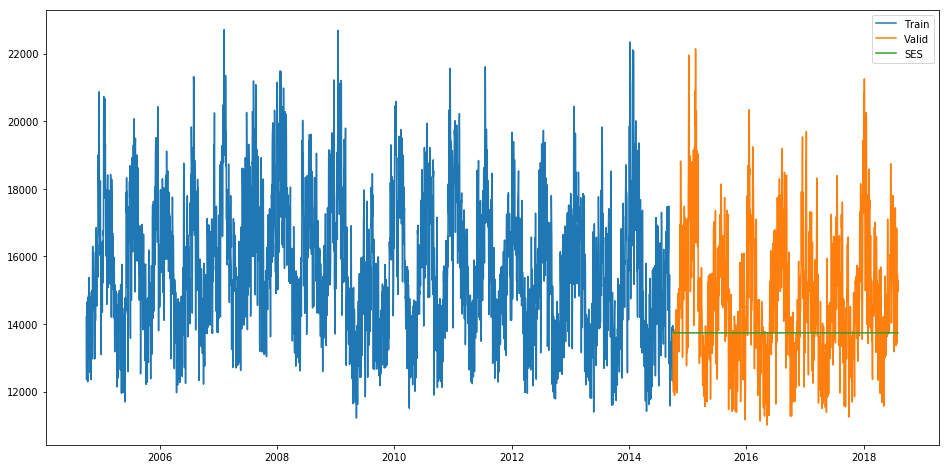

In [36]:
# Simple exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['AEP_MW'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['AEP_MW'], label='Train')
plt.plot(valid['AEP_MW'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [37]:
rms = sqrt(mean_squared_error(valid.AEP_MW, y_hat_avg.SES))
print(rms)

2172.9446991757563


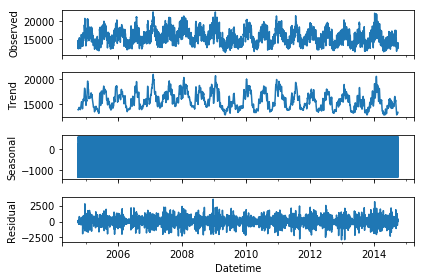

In [38]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.AEP_MW).plot()
result = sm.tsa.stattools.adfuller(Train.AEP_MW)
plt.show()

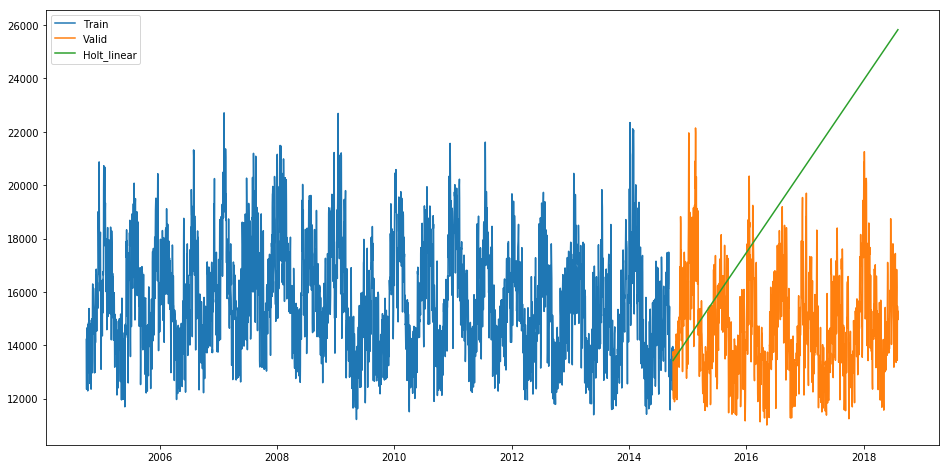

In [39]:
# Holt's Linear trend model
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['AEP_MW'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['AEP_MW'], label='Train')
plt.plot(valid['AEP_MW'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [40]:
rms = sqrt(mean_squared_error(valid.AEP_MW, y_hat_avg.Holt_linear))
print(rms)

6318.221983044262


In [46]:
submission = pd.read_csv("Project3/energy_submission.csv")
submission.head()

,ID,AEP_MW


In [47]:
# Making predictions
predict=fit1.forecast(len(test_df))

In [48]:
test_df['prediction']=predict

In [49]:
# Calculating the hourly ratio of count
train_df['ratio']=train_df['AEP_MW']/train_df['AEP_MW'].sum()

# Grouping the hourly ratio
temp=train_df.groupby(['Hour'])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('Energy_GROUPby.csv')

temp2=pd.read_csv("Energy_GROUPby.csv")
temp2=temp2.drop('Hour.1',1)

# Merge Test and test_original on day, month and year
merge=pd.merge(test_df, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['AEP_MW']=prediction['prediction']*prediction['ratio']*24

In [50]:
submission=prediction.drop(['day','Hour','ratio','prediction'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Energy_Holt_linear.csv')

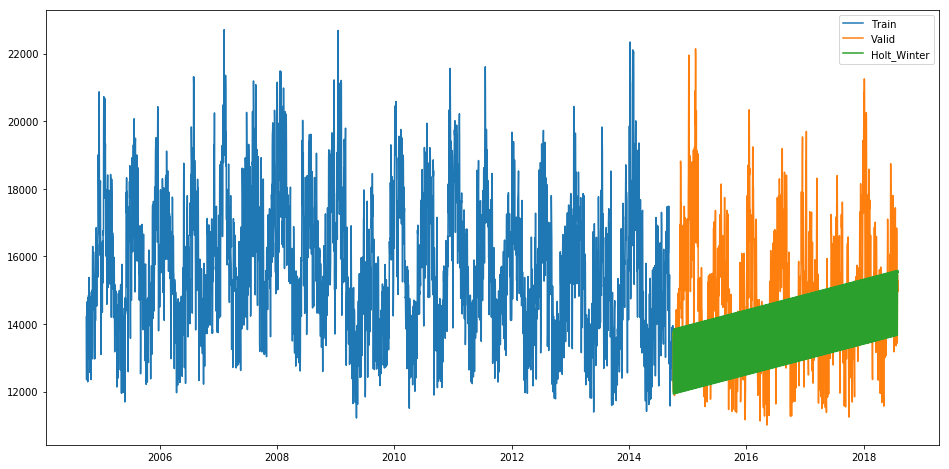

In [51]:
# Holt winter's model on daily time series
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['AEP_MW']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['AEP_MW'], label='Train')
plt.plot(valid['AEP_MW'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [52]:
rms = sqrt(mean_squared_error(valid.AEP_MW, y_hat_avg.Holt_Winter))
print(rms)

1998.922198297088


In [53]:
predict=fit1.forecast(len(test_df))

In [54]:
test_df['prediction']=predict

In [55]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test_df, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['AEP_MW']=prediction['prediction']*prediction['ratio']*24

In [56]:
energy_submission=prediction.drop(['day','Hour','ratio','prediction'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','AEP_MW']).to_csv('Energy_Holt winters.csv')

In [100]:
# Checking Energy Holt csv
energy_holt_csv_check = pd.read_csv("Energy_Holt winters.csv")
energy_holt_csv_check.head()

,Unnamed: 0,ID,AEP_MW
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN


In [57]:
# Dickey Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling( window=24).mean() # 24 hours on each day
    rolstd = pd.Series(timeseries).rolling(window=24).mean()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [58]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

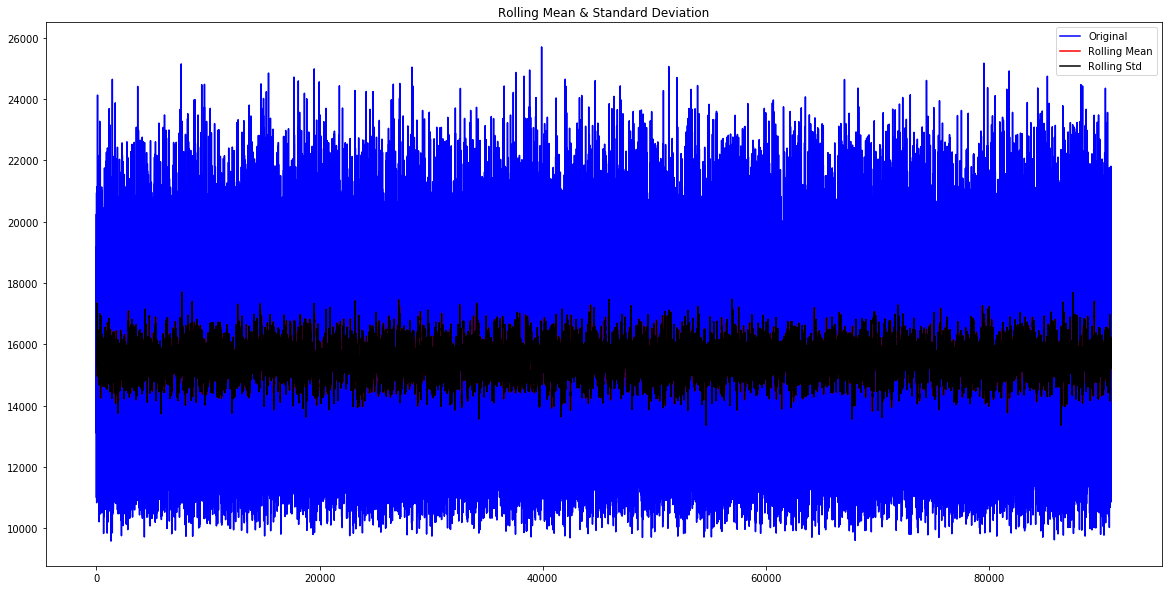

Results of Dickey-Fuller Test:
Test Statistic                  -300.850509
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    90953.000000
Critical Value (1%)               -3.430422
Critical Value (5%)               -2.861572
Critical Value (10%)              -2.566787
dtype: float64


In [59]:
test_stationarity(train_original['AEP_MW'])

In [62]:
Train_log = np.log(Train['AEP_MW'])
valid_log = np.log(valid['AEP_MW'])

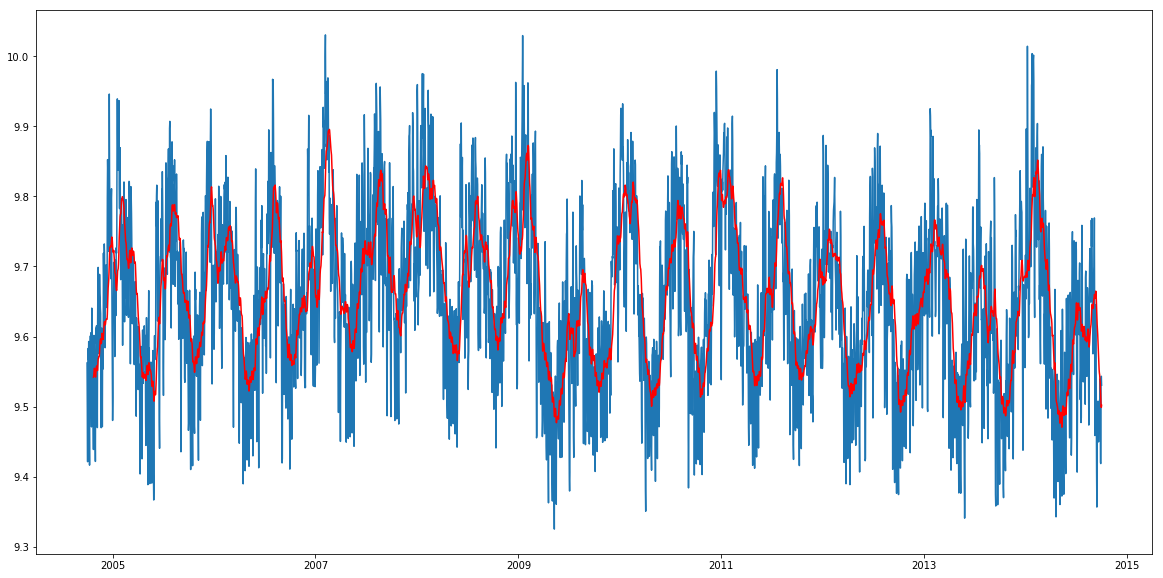

In [63]:
# Taking rolling mean
moving_avg = pd.Series(Train_log).rolling(window=24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [64]:
# Removing trend
train_log_moving_avg_diff = Train_log - moving_avg

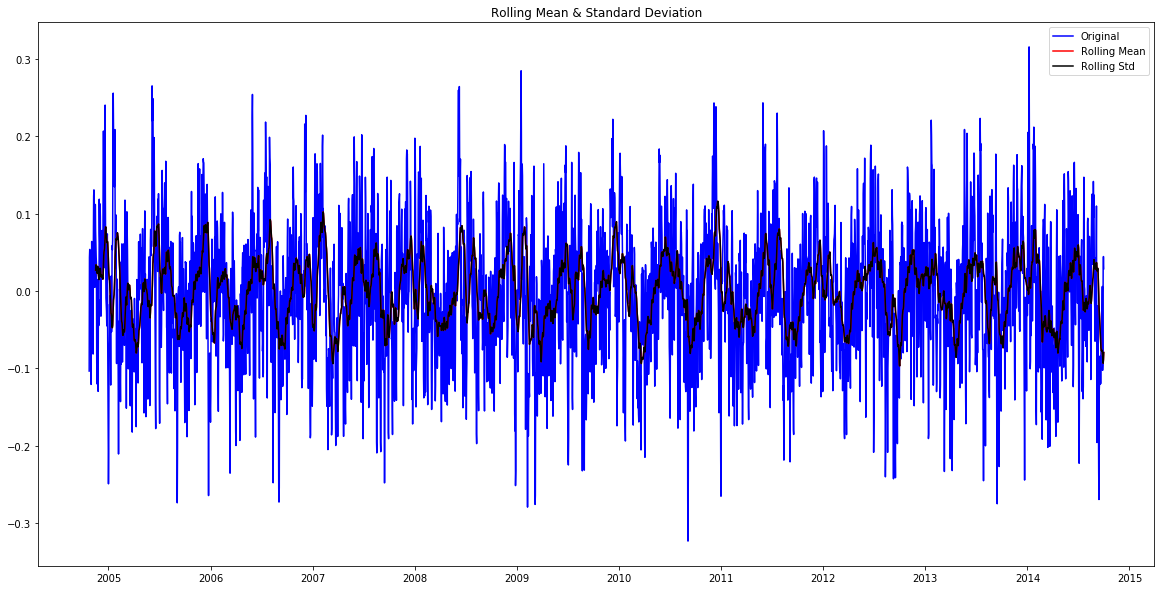

Results of Dickey-Fuller Test:
Test Statistic                -9.810566e+00
p-value                        5.671799e-17
#Lags Used                     2.800000e+01
Number of Observations Used    3.601000e+03
Critical Value (1%)           -3.432167e+00
Critical Value (5%)           -2.862343e+00
Critical Value (10%)          -2.567197e+00
dtype: float64


In [65]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

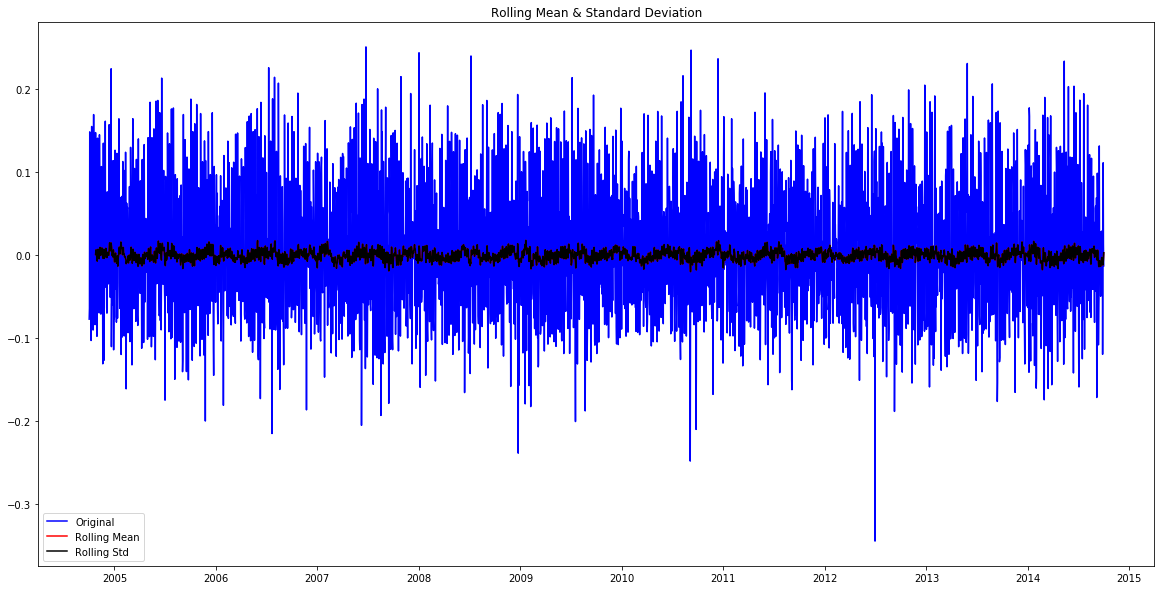

Results of Dickey-Fuller Test:
Test Statistic                -1.303001e+01
p-value                        2.355776e-24
#Lags Used                     2.700000e+01
Number of Observations Used    3.624000e+03
Critical Value (1%)           -3.432156e+00
Critical Value (5%)           -2.862338e+00
Critical Value (10%)          -2.567195e+00
dtype: float64


In [66]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

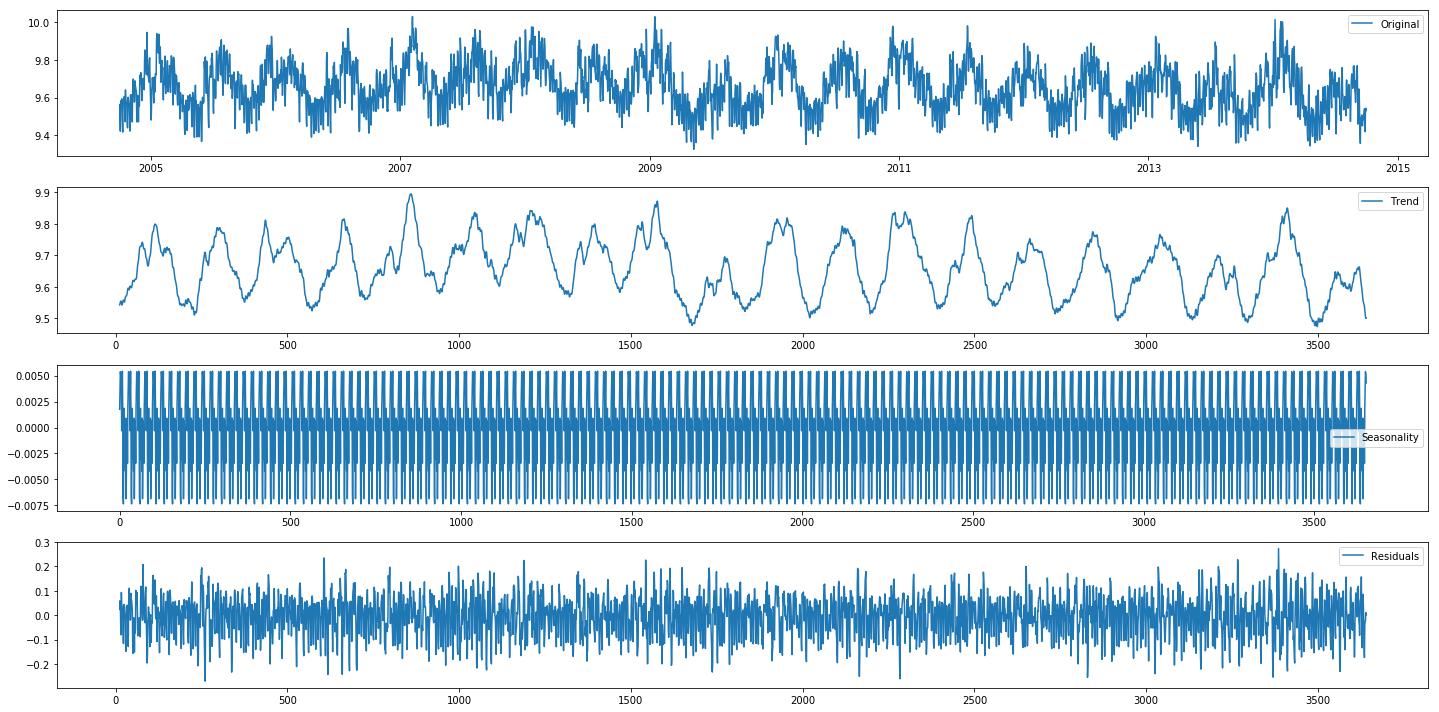

In [67]:
# Decomposing the time series into trend, seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).AEP_MW.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

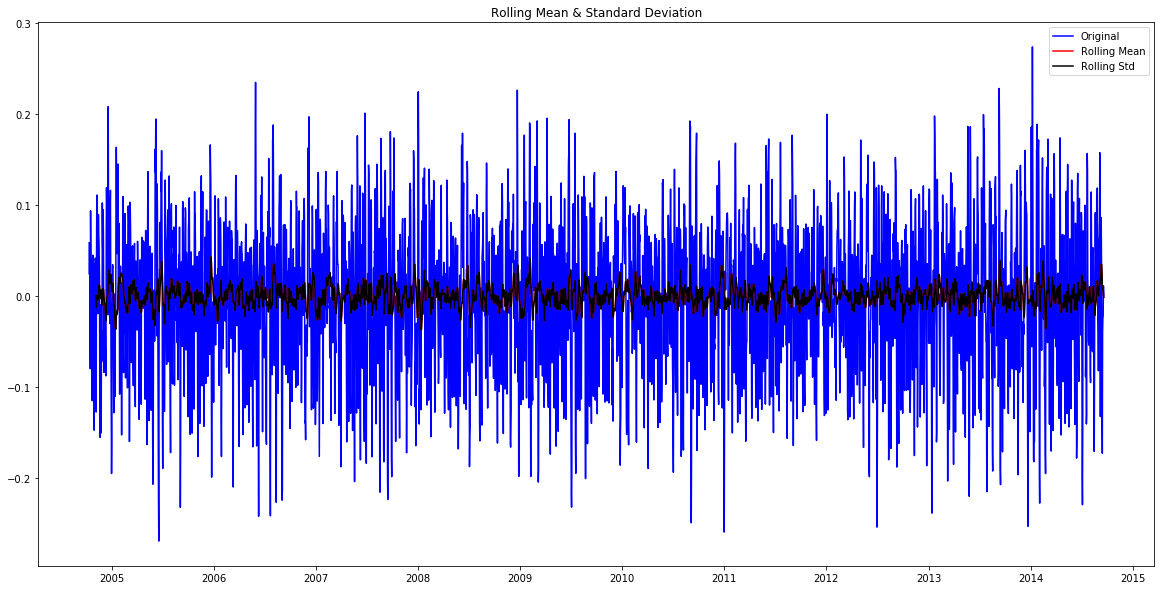

Results of Dickey-Fuller Test:
Test Statistic                -1.879732e+01
p-value                        2.023066e-30
#Lags Used                     3.000000e+01
Number of Observations Used    3.598000e+03
Critical Value (1%)           -3.432169e+00
Critical Value (5%)           -2.862344e+00
Critical Value (10%)          -2.567198e+00
dtype: float64


In [68]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

In [69]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

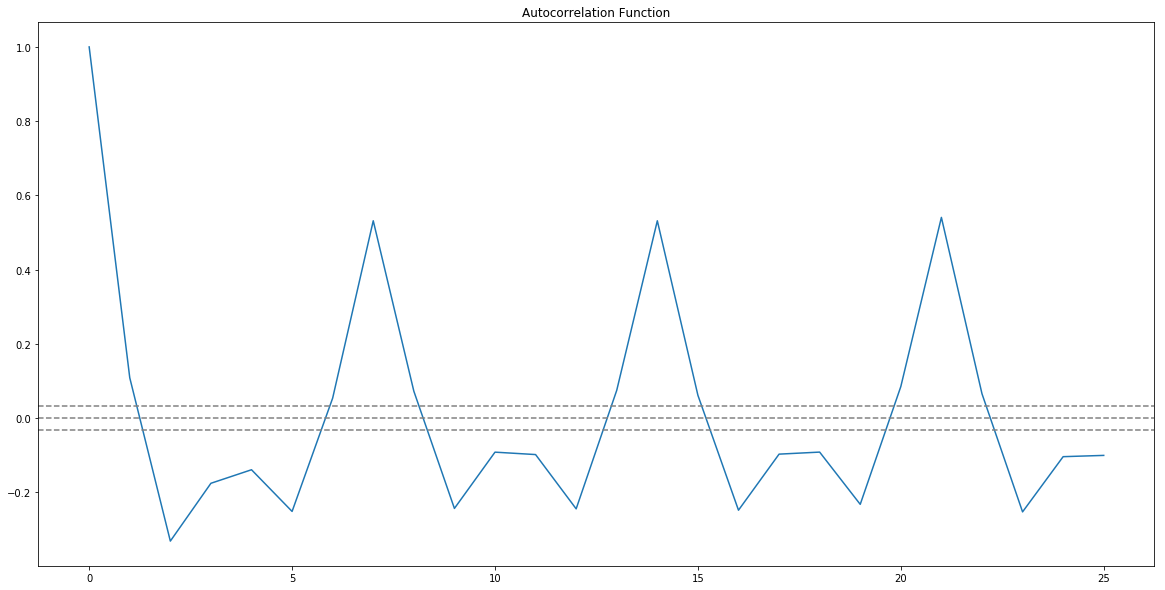

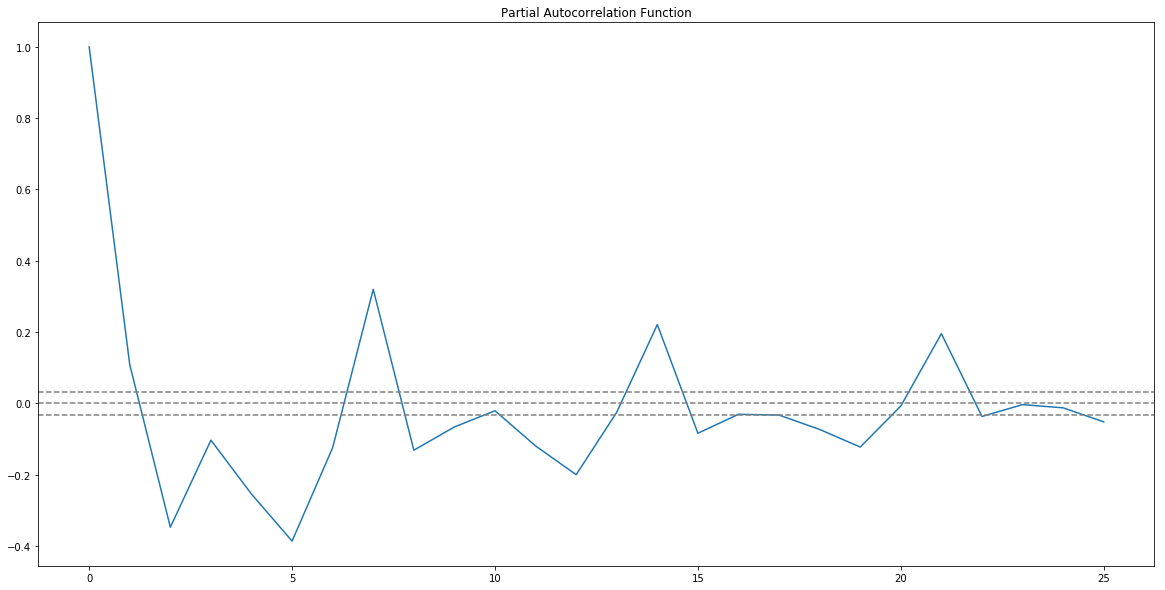

In [70]:
# ACF and PACF plot
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [71]:
from statsmodels.tsa.arima_model import ARIMA

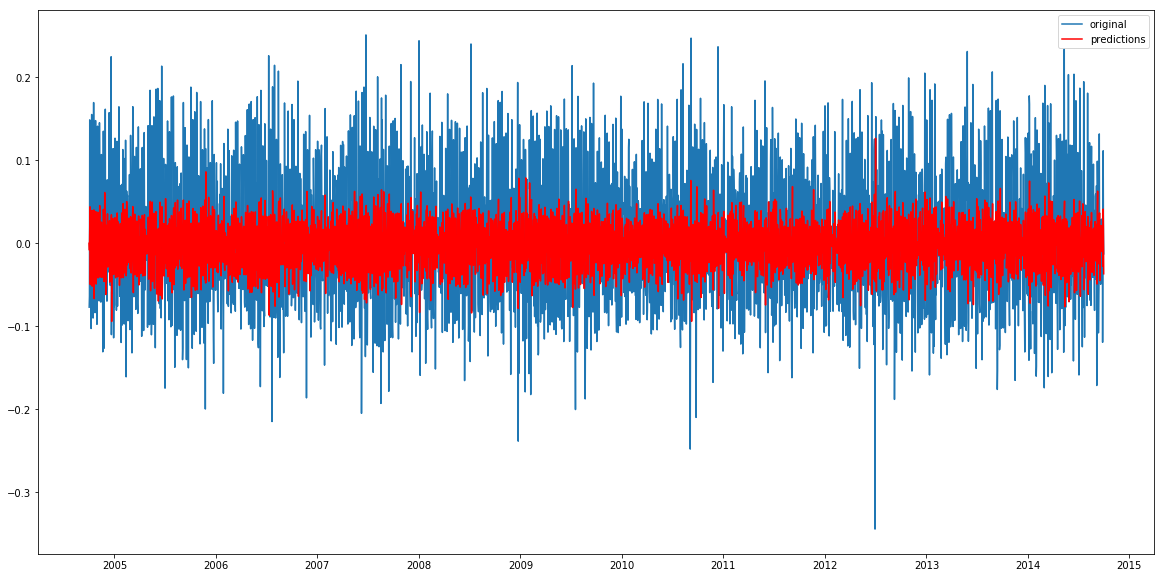

In [72]:
# AR model
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [73]:
# predictions using AR model 
AR_predict=results_AR.predict(start="2014-10-02", end="2018-08-03")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['AEP_MW'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

ValueError: shapes (1402,) and (1401,) not aligned: 1402 (dim 0) != 1401 (dim 0)

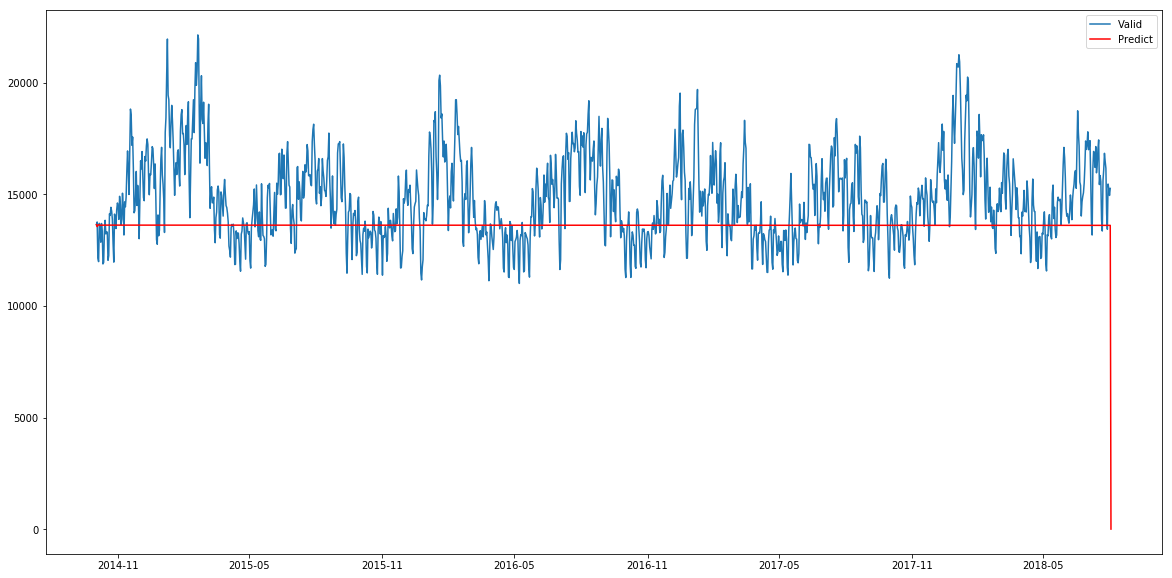

In [74]:
# Validating the AR model
plt.plot(valid['AEP_MW'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['AEP_MW']))/valid.shape[0]))
plt.show()

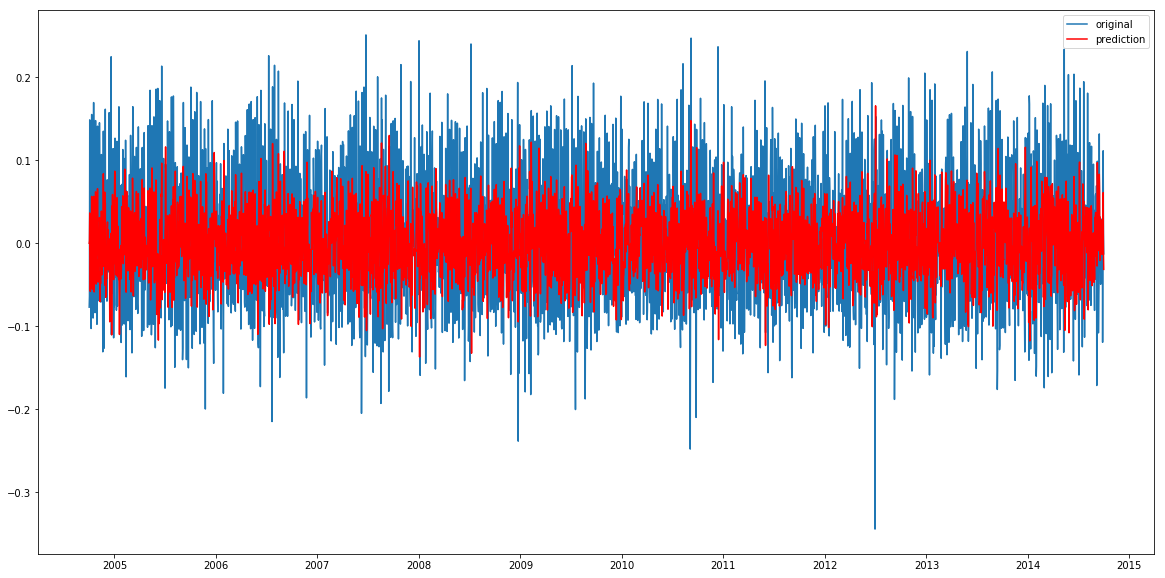

In [75]:
# MA model
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [76]:
# predictions using MA model
MA_predict=results_MA.predict(start="2014-10-02", end="2018-08-03")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['AEP_MW'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

ValueError: shapes (1402,) and (1401,) not aligned: 1402 (dim 0) != 1401 (dim 0)

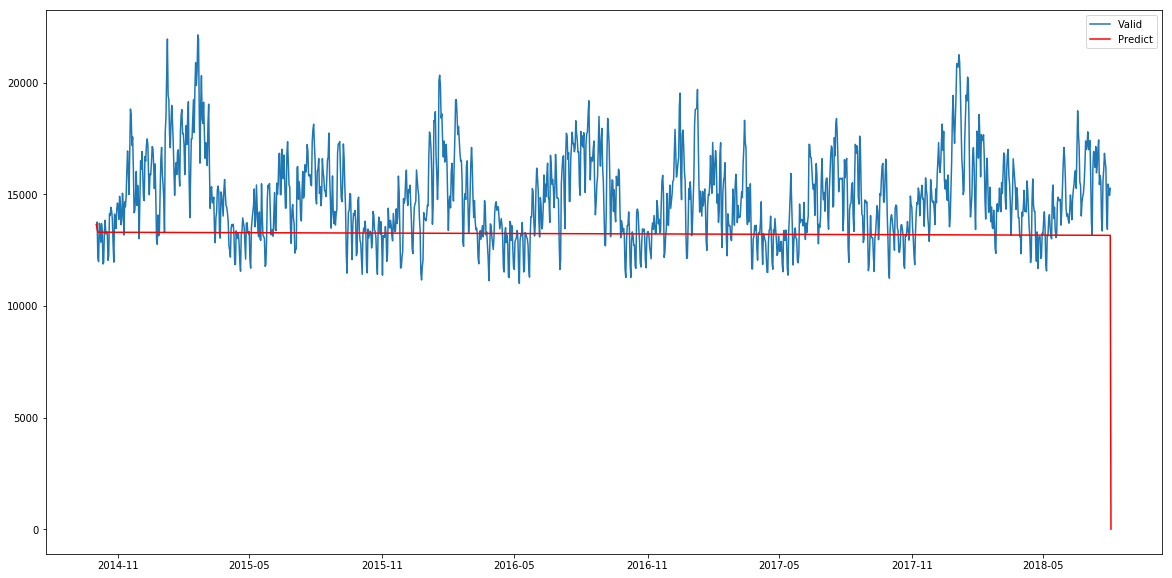

In [78]:
# validating the MA model
plt.plot(valid['AEP_MW'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['AEP_MW']))/valid.shape[0]))
plt.show()

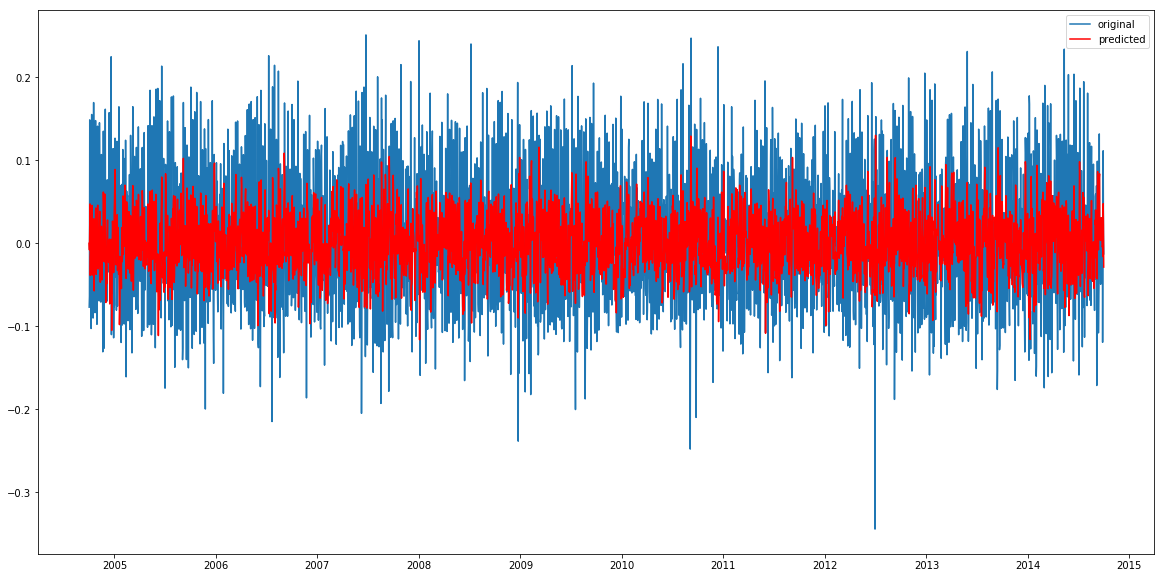

In [79]:
# ARIMA model
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [81]:
# Rescaling the values
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['AEP_MW'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['AEP_MW'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['AEP_MW']))/given_set.shape[0]))
    plt.show()

In [83]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['AEP_MW'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['AEP_MW']))/given_set.shape[0]))
    plt.show()

In [84]:
# predictions using ARIMA
ARIMA_predict_diff=results_ARIMA.predict(start="2014-10-02", end="2018-08-03")

ValueError: shapes (1402,) and (1401,) not aligned: 1402 (dim 0) != 1401 (dim 0)

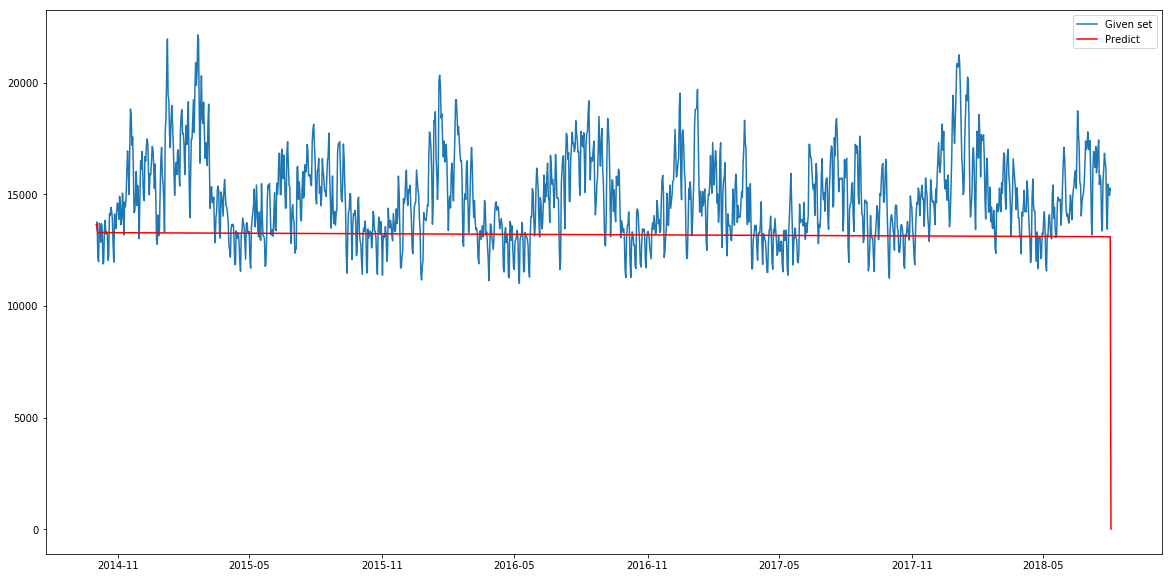

In [85]:
# validating the predictions
check_prediction_diff(ARIMA_predict_diff, valid)

In [86]:
import statsmodels.api as sm

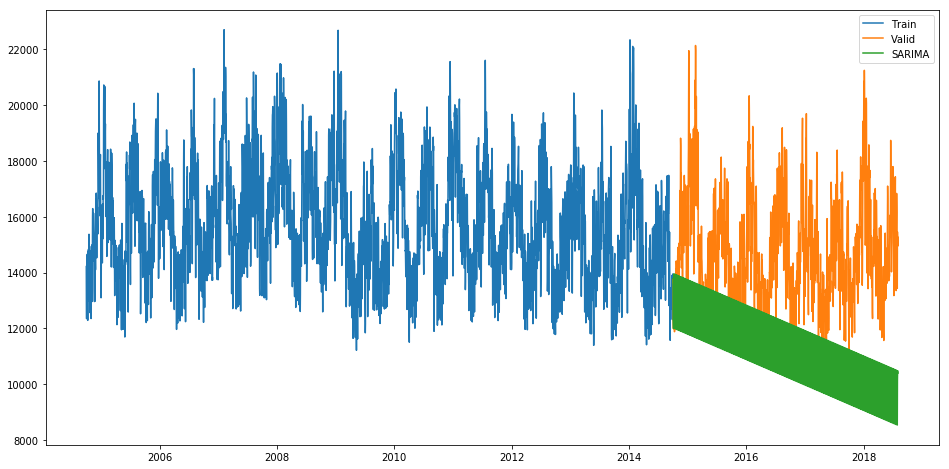

In [88]:
# SARIMAX model
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.AEP_MW, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-10-02", end="2018-08-03", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['AEP_MW'], label='Train')
plt.plot(valid['AEP_MW'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [90]:
rms = sqrt(mean_squared_error(valid.AEP_MW, y_hat_avg.SARIMA))
print(rms)

3819.5423575334094


In [91]:
# Predictions using SARIMAX model
predict=fit1.predict(start="2014-10-02", end="2018-08-03", dynamic=True)

In [93]:
test_df['prediction']=predict

In [94]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test_df, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['AEP_MW']=prediction['prediction']*prediction['ratio']*24

In [95]:
submission=prediction.drop(['day','Hour','ratio','prediction'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','AEP_MW']).to_csv('SARIMAX.csv')

In [96]:
check = pd.read_csv('SARIMAX.csv')
check.head()

,Unnamed: 0,ID,AEP_MW
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
